In [1]:
from scipy.io import loadmat
import pickle
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
data_file = loadmat('./Amazon.mat')
labels = data_file['label'].flatten()
feat_data = data_file['features'].todense().A

In [3]:
# The first 3304 nodes are not labeled
count_labels = Counter(labels[3305:])
percentages = {k: v/len(labels[3305:]) for k, v in count_labels.items()}
print("Proportion of each class in the labeled data:")
print(f"\tClass 0: {percentages[0]:.2%}")
print(f"\tClass 1: {percentages[1]:.2%}")
print("Number of labeled nodes:", len(labels[3305:]))
print("Total number of nodes:", len(labels))
print("Number of features:", feat_data.shape[1])

Proportion of each class in the labeled data:
	Class 0: 90.50%
	Class 1: 9.50%
Number of labeled nodes: 8639
Total number of nodes: 11944
Number of features: 25


In [4]:
print('Number of nodes:', len(labels))

Number of nodes: 11944


In [5]:
with open('amz_homo_adjlists.pickle', 'rb') as file:
    homo = pickle.load(file)
file.close()

In [6]:
list_edges = []
for i in range(len(labels)):
    list_edges.append(len(homo[i]))

print(f"Average number of edges per node: {np.mean(list_edges):.4}")
print(f"Median number of edges per node: {np.median(list_edges)}")

Average number of edges per node: 737.5
Median number of edges per node: 400.0


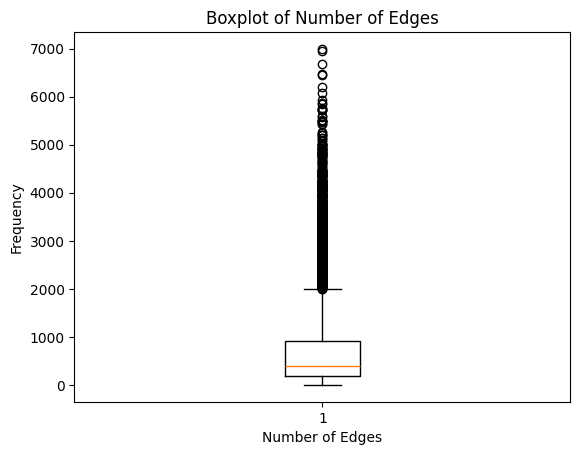

In [7]:
plt.boxplot(list_edges)
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')
plt.title('Boxplot of Number of Edges')
plt.show()


In [8]:
# Random forest model on node features for amazon graph
y_model, data_model = labels[3305:], feat_data[3305:, :]

X_train, X_test, y_train, y_test = train_test_split(data_model, y_model, test_size=0.2, random_state=42, stratify=y_model)


model = RandomForestClassifier(n_estimators=150,class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1564
         1.0       0.93      0.84      0.88       164

    accuracy                           0.98      1728
   macro avg       0.96      0.92      0.94      1728
weighted avg       0.98      0.98      0.98      1728



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *

# Assuming 'feat_data' and 'labels' are defined as per your context
# Combine features and labels into a single DataFrame
data = pd.DataFrame(feat_data[3305:, :], columns=[f'feature_{i}' for i in range(feat_data.shape[1])])
data['target'] = labels[3305:]

# Splitting the data into training and testing dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])

# Setup PyCaret - target column is 'target'
clf1 = setup(data=train_data, target='target', session_id=42, use_gpu=True)

# Compare models
best_model = compare_models()

# Optionally, you can also evaluate the models on the test dataset
predict_model(best_model, data=test_data)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(6911, 26)"
4,Transformed data shape,"(6911, 26)"
5,Transformed train set shape,"(4837, 26)"
6,Transformed test set shape,"(2074, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9758,0.9837,0.8217,0.9155,0.8652,0.8520,0.8540,0.7160
knn,K Neighbors Classifier,0.9750,0.9058,0.7696,0.9596,0.8529,0.8395,0.8462,0.0820
ada,Ada Boost Classifier,0.9748,0.9808,0.8152,0.9108,0.8591,0.8453,0.8476,0.2590
lr,Logistic Regression,0.9740,0.9699,0.7739,0.9415,0.8488,0.8348,0.8399,0.6510
rf,Random Forest Classifier,0.9735,0.9753,0.7891,0.9241,0.8490,0.8347,0.8391,0.4940
lightgbm,Light Gradient Boosting Machine,0.9733,0.9828,0.8065,0.9032,0.8503,0.8358,0.8384,1.3310
xgboost,Extreme Gradient Boosting,0.9723,0.9819,0.8087,0.8919,0.8464,0.8313,0.8336,0.2260
et,Extra Trees Classifier,0.9696,0.9649,0.7848,0.8859,0.8303,0.8137,0.8167,0.3750
dt,Decision Tree Classifier,0.9634,0.9029,0.8283,0.7959,0.8106,0.7904,0.7913,0.0460
lda,Linear Discriminant Analysis,0.9597,0.9593,0.6543,0.8938,0.7544,0.7331,0.7443,0.0660


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9815,0.9805,0.8720,0.9286,0.8994,0.8892,0.8897


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,target,prediction_label,prediction_score
1391,1.00,38.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,4.00,2.00,0.00,0.00,1.00,53.00,1.00,0.00,0,1.00
5799,1.00,12.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,5.00,1.00,0.00,0.00,1.00,32.00,1.00,0.00,0,1.00
4895,7.00,15.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,...,5.00,0.00,749.00,0.96,0.00,28.43,1.00,0.00,0,1.00
4230,1.00,9.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,4.00,3.00,0.00,0.00,1.00,17.00,1.00,0.00,0,1.00
6771,1.00,11.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,5.00,1.00,0.00,0.00,1.00,18.00,1.00,0.00,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7697,2.00,10.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,4.50,0.00,0.00,0.00,1.00,20.00,1.00,0.00,0,0.99
7997,1.00,7.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,3.00,0.00,0.00,1.00,18.00,-1.00,0.00,0,0.99
1849,7.00,8.00,2.00,0.00,0.00,0.00,5.00,0.29,0.00,0.00,...,3.86,0.00,1839.00,1.55,0.00,33.57,1.00,0.00,0,0.99
4917,3.00,12.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,...,4.00,0.00,2322.00,1.10,0.00,52.67,1.00,0.00,0,1.00


In [22]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import classification_report

# Assuming 'feat_data' and 'labels' are defined as per your context
# Combine features and labels into a single DataFrame
data = pd.DataFrame(feat_data[3305:, :], columns=[f'feature_{i}' for i in range(feat_data.shape[1])])
data['target'] = labels[3305:]

# Splitting the data into training and testing dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])

# Setup PyCaret - target column is 'target'
clf1 = setup(data=train_data, target='target', session_id=42, use_gpu=True)

# Compare models
best_model = compare_models()

# Create a model based on the best model found by compare_models
final_best_model = finalize_model(best_model)

# Predict on the test set
predictions = predict_model(final_best_model, data=test_data)

# Extract the true labels and predicted labels from the predictions DataFrame
true_labels = predictions['target']
predicted_labels = predictions['prediction_label']

# Generate a classification report
report = classification_report(true_labels, predicted_labels)
print(report)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(6911, 26)"
4,Transformed data shape,"(6911, 26)"
5,Transformed train set shape,"(4837, 26)"
6,Transformed test set shape,"(2074, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9758,0.9837,0.8217,0.9155,0.8652,0.8520,0.8540,0.7180
knn,K Neighbors Classifier,0.9750,0.9058,0.7696,0.9596,0.8529,0.8395,0.8462,0.0640
ada,Ada Boost Classifier,0.9748,0.9808,0.8152,0.9108,0.8591,0.8453,0.8476,0.2610
lr,Logistic Regression,0.9740,0.9699,0.7739,0.9415,0.8488,0.8348,0.8399,0.5810
rf,Random Forest Classifier,0.9735,0.9753,0.7891,0.9241,0.8490,0.8347,0.8391,0.5020
lightgbm,Light Gradient Boosting Machine,0.9733,0.9828,0.8065,0.9032,0.8503,0.8358,0.8384,0.7330
xgboost,Extreme Gradient Boosting,0.9723,0.9819,0.8087,0.8919,0.8464,0.8313,0.8336,0.2390
et,Extra Trees Classifier,0.9696,0.9649,0.7848,0.8859,0.8303,0.8137,0.8167,0.3850
dt,Decision Tree Classifier,0.9634,0.9029,0.8283,0.7959,0.8106,0.7904,0.7913,0.0460
lda,Linear Discriminant Analysis,0.9597,0.9593,0.6543,0.8938,0.7544,0.7331,0.7443,0.0650


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9809,0.9809,0.8720,0.9226,0.8966,0.8860,0.8865


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1564
         1.0       0.92      0.87      0.90       164

    accuracy                           0.98      1728
   macro avg       0.95      0.93      0.94      1728
weighted avg       0.98      0.98      0.98      1728



In [23]:
## YELP

In [22]:
data_file = loadmat('./Data/YelpChi.mat')
labels = data_file['label'].flatten()
feat_data = data_file['features'].todense().A

# Random forest model on node features for Yelp graph
X_train, X_test, y_train, y_test = train_test_split(feat_data, labels, test_size=0.2, random_state=42, stratify=labels)


model = RandomForestClassifier(n_estimators=150,class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7856
           1       0.89      0.38      0.53      1335

    accuracy                           0.90      9191
   macro avg       0.90      0.68      0.74      9191
weighted avg       0.90      0.90      0.89      9191



In [26]:
import networkx as nx

with open('./Data/amz_homo_adjlists.pickle', 'rb') as file:
    homo = pickle.load(file)
file.close()

In [27]:
from tqdm import tqdm

graph = nx.Graph()

for i in tqdm(range(len(homo))):
    for j in range(len(homo[i])):
        graph.add_edge(i, j)

100%|██████████| 11944/11944 [00:48<00:00, 245.40it/s]


In [30]:
data_file = loadmat('./Data/Amazon.mat')
labels = data_file['label'].flatten()

In [38]:
node_labels = {k:{"label":v} for k, v in enumerate(labels)}
nx.set_node_attributes(graph, node_labels)

In [ ]:
nx.write_gexf(graph, "amazon_only_label.gexf")